<img src="https://drive.google.com/uc?id=1ZqfTZXZSujHyoCwHMQyZ9GQSzncvFX0T" width="400">
<br>
<b>
<font size="6" face="arial" color="blue">
    Graduação em Ciência da Computação
</font>
</b>
<br>
<b>
<font size="4" face="arial">
    Disciplina: Métodos Quantitativos em Computação
</font>
</b>

**Orientador: Prof. Me. Ricardo Carubbi** <br>
*Docente da Graduação e Pós-Graduação em Ciência de Dados e Inteligência Artificial*<br>
*Laboratório de Ciência de Dados e Inteligência Artificial*<br>
*Universidade de Fortaleza*<br>

**Dupla**:
- Maurício Oliveira| 2410481
- Thiago Naoki| 2513115

# **Checkpoint Técnico: Seg 01/12**

#### **Importações de bibliotecas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint

#### **Leitura do DataFrame**



In [ ]:
df = pd.read_csv('ihdp.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4600 non-null   int64  
 1   idade       4600 non-null   int64  
 2   etnia       4600 non-null   object 
 3   edu         4600 non-null   object 
 4   trab        4600 non-null   object 
 5   prenatal    4600 non-null   object 
 6   cigarro     4600 non-null   object 
 7   alcool      4600 non-null   object 
 8   genero      4600 non-null   object 
 9   primog      4600 non-null   object 
 10  peso        4373 non-null   float64
 11  premat      4600 non-null   int64  
 12  hosp        4600 non-null   int64  
 13  renda       4600 non-null   int64  
 14  trt         4600 non-null   object 
 15  QI          4600 non-null   int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 575.1+ KB


In [ ]:
display(df.head(20))

,Unnamed: 0,idade,etnia,edu,trab,prenatal,cigarro,alcool,genero,primog,peso,premat,hosp,renda,trt,QI
0,1,33,branca,superior,sim,sim,nao,nao,masculino,nao,1559.0,10,31,42500,caso,111
1,2,22,negra,medio_incompleto,nao,sim,nao,sim,masculino,nao,2240.0,3,4,5000,caso,81
2,3,13,negra,medio_incompleto,nao,sim,nao,nao,masculino,sim,1900.0,6,9,12500,caso,92
3,4,25,negra,superior,sim,sim,nao,nao,masculino,sim,1550.0,8,50,42500,caso,103
4,5,19,negra,medio_incompleto,nao,sim,sim,nao,masculino,nao,2270.0,5,4,5000,caso,81
5,6,19,negra,medio,sim,sim,sim,sim,feminino,sim,1550.0,4,13,12500,caso,94
6,7,26,branca,medio_incompleto,sim,sim,sim,nao,masculino,nao,2330.0,9,8,17500,caso,104
7,8,20,branca,medio_incompleto,nao,sim,sim,sim,feminino,nao,2410.0,3,6,11344,caso,82
8,9,23,branca,medio,sim,sim,nao,nao,feminino,nao,1776.0,6,30,30000,caso,107
9,10,28,negra,medio,sim,sim,sim,nao,masculino,nao,2140.0,5,2,8750,caso,79


#### **Pré-processamento finalizado (limpeza de nulos e binarização do tratamento).**



In [ ]:
mediana_peso = df['peso'].median()
df['peso'] = df['peso'].fillna(mediana_peso)

In [ ]:
qi = df["QI"].value_counts()
primog = df["primog"].value_counts()
alcool = df["alcool"].value_counts()
cigarro = df["cigarro"].value_counts()
hosp = df["hosp"].value_counts()
genero = df["genero"].value_counts()
peso = df["peso"].value_counts()
idade = df["idade"].value_counts()
premat = df["premat"].value_counts() #semanas que nasceu prematuro
trt = df["trt"].value_counts() #caso(receberam tratamento) - controle(vida normal)

In [ ]:
primog_bin = df["primog"].map({"nao": 0, "sim": 1})
trt_bin = df["trt"].map({"controle": 0, "caso": 1})
alcool_bin = df["alcool"].map({"nao": 0, "sim": 1})
cigarro_bin = df["cigarro"].map({"nao": 0, "sim": 1})
genero_bin = df["genero"].map({"feminino": 0, "masculino": 1})

#### **Análise exploratória**

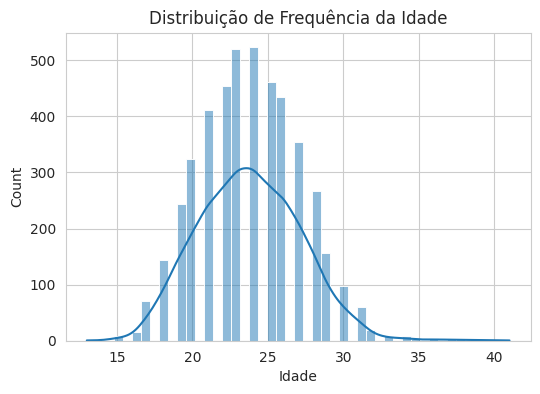

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['idade'], kde=True)
plt.title('Distribuição de Frequência da Idade')
plt.xlabel('Idade')
plt.show()

A análise da distribuição de frequência da variável idade (Idade da Mãe) por meio do histograma indica que a tendência central (média) se localiza em 23 anos. A visualização sugere que a maioria da massa de dados está concentrada na extremidade inferior da faixa etária, caracterizando uma amostra predominantemente jovem. A inclusão dessa covariável no Modelo 6 é vital para isolar o efeito causal da intervenção (trt), controlando pelo possível viés de seleção induzido pela idade materna.

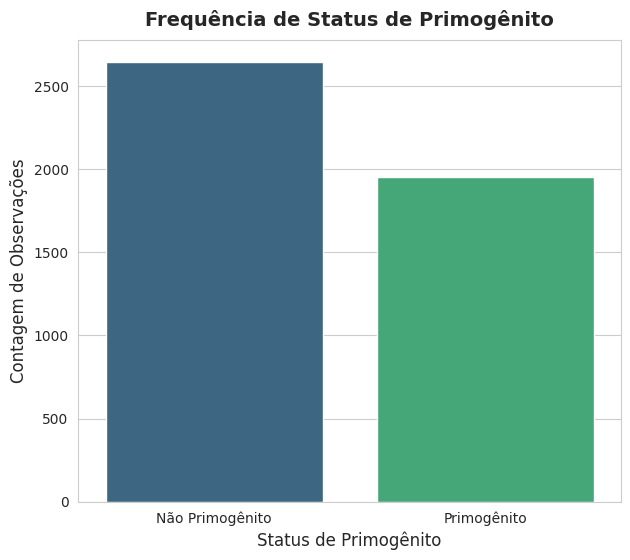

In [ ]:
df['Rotulo_Primog'] = np.where(primog_bin == 1, 'Primogênito', 'Não Primogênito')

# --- 2. CONFIGURAÇÃO E GERAÇÃO DO GRÁFICO DE BARRAS SIMPLES ---
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))

# Chamada simples e correta do countplot
ax = sns.countplot(
    x='Rotulo_Primog',
    data=df,
    hue='Rotulo_Primog',
    palette='viridis',
    legend=False
)

# --- 3. TÍTULOS E RÓTULOS ESSENCIAIS ---
plt.title(
    'Frequência de Status de Primogênito',
    fontsize=14,
    fontweight='bold',
    pad=10
)
plt.xlabel('Status de Primogênito', fontsize=12)
plt.ylabel('Contagem de Observações', fontsize=12)

plt.show()

A análise quantitativa revela uma distribuição de frequência desbalanceada, onde a massa de dados está concentrada no grupo de Não Primogênitos. Este grupo representa a maioria das observações, enquanto os Primogênitos constituem o grupo minoritário.

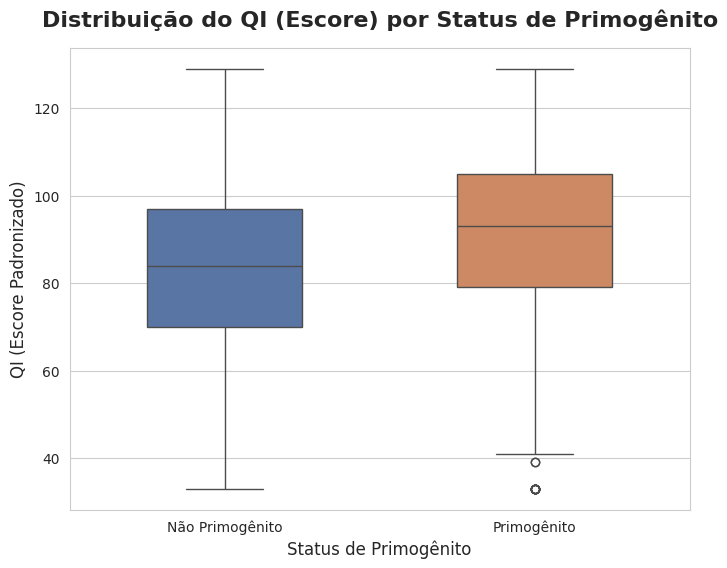

In [ ]:
df['primog_binary'] = primog_bin
df['Rotulo_Primog'] = np.where(df['primog_binary'] == 1, 'Primogênito', 'Não Primogênito')

sns.set_style("whitegrid")

# --- Geração do Boxplot ---
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='Rotulo_Primog',
    y='QI',
    data=df,
    hue='Rotulo_Primog',
    palette='deep',
    legend=False,
    width=0.5
)

# --- Formatação de Títulos e Rótulos ---
plt.title(
    'Distribuição do QI (Escore) por Status de Primogênito',
    fontsize=16,
    fontweight='bold',
    pad=15
)
plt.xlabel('Status de Primogênito', fontsize=12)
plt.ylabel('QI (Escore Padronizado)', fontsize=12)

plt.show()

A distribuição do escore de QI entre bebês primogênitos e não primogênitos, analisada por meio do boxplot, revela diferenças claras entre os dois perfis. Observa-se que os bebês primogênitos apresentam uma mediana de QI mais elevada, além de uma concentração maior de valores nas faixas superiores da distribuição. Já os bebês não primogênitos exibem mediana mais baixa e maior dispersão, indicando maior variabilidade e presença de valores relativamente menores.

Essa visualização é importante para o Modelo 6, pois sugere que a ordem de nascimento pode estar associada ao desenvolvimento cognitivo inicial. Assim, incluir essa covariável ajuda a controlar diferenças pré-existentes entre os bebês e a reduzir possíveis fontes de confundimento na estimativa do efeito da intervenção (trt)

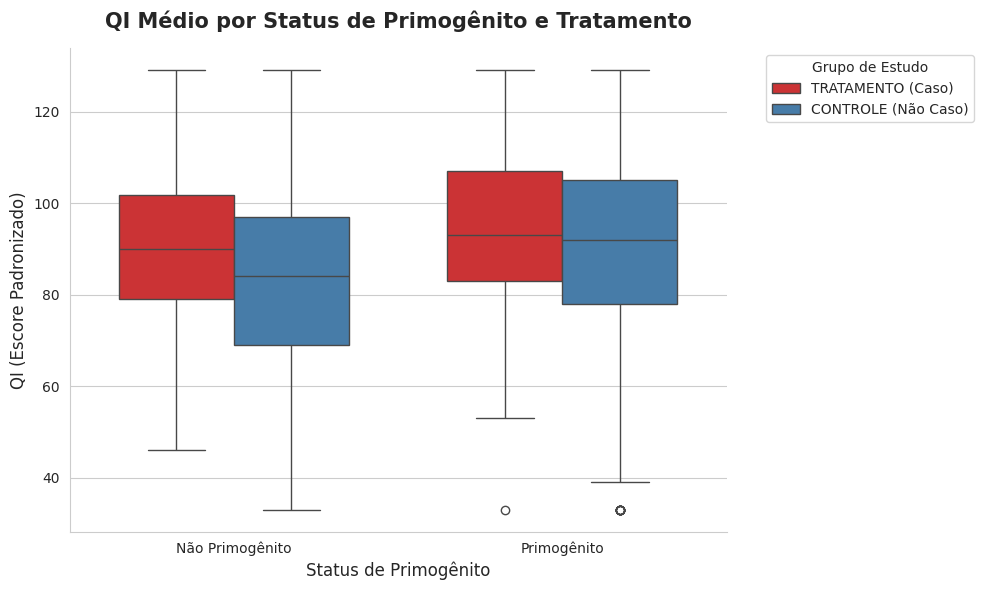

In [ ]:
df['Rotulo_Tratamento'] = np.where(trt_bin == 1, 'TRATAMENTO (Caso)', 'CONTROLE (Não Caso)')

# --- 2. GERAÇÃO DO BOXPLOT AGRUPADO ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Rotulo_Primog',        # Variável principal no eixo X
    y='QI',                   # Variável resposta
    hue='Rotulo_Tratamento',
    data=df,
    palette='Set1',
    width=0.7
)

# --- 3. TÍTULOS E RÓTULOS PROFISSIONAIS ---
plt.title(
    'QI Médio por Status de Primogênito e Tratamento',
    fontsize=15,
    fontweight='bold',
    pad=15
)
plt.xlabel('Status de Primogênito', fontsize=12)
plt.ylabel('QI (Escore Padronizado)', fontsize=12)


plt.legend(title='Grupo de Estudo', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

A análise conjunta do QI dos bebês segundo o status de primogênito e o grupo de estudo (tratamento vs. controle) revela padrões consistentes e informativos. Entre os não primogênitos, os bebês que receberam o tratamento apresentam valores de QI ligeiramente mais altos, com mediana superior e menor concentração de escores muito baixos em comparação aos bebês do grupo controle. Isso sugere um possível efeito positivo da intervenção para essa categoria.

Entre os bebês primogênitos, a diferença entre os grupos também se mantém: o grupo tratado apresenta uma mediana levemente superior ao controle, além de uma distribuição mais concentrada em faixas altas de QI. Ainda assim, ambos os perfis de primogênitos exibem desempenho cognitivo médio maior do que o observado entre não primogênitos.

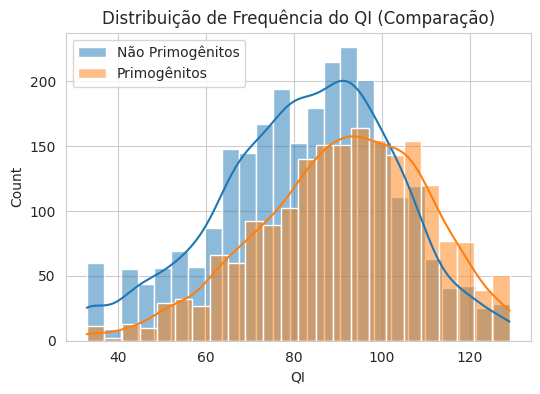

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(df[primog_bin == 0]['QI'], kde=True, label='Não Primogênitos', alpha=0.5)
sns.histplot(df[primog_bin == 1]['QI'], kde=True, label='Primogênitos', alpha=0.5)


plt.title('Distribuição de Frequência do QI (Comparação)')
plt.xlabel('QI')
plt.legend()

plt.show()


A comparação das distribuições de QI entre bebês primogênitos e não primogênitos revela diferenças claras na forma e na posição das curvas. A distribuição dos não primogênitos concentra-se mais intensamente em valores medianos, com pico em torno de 85 a 95 pontos, e apresenta maior frequência de escores baixos, especialmente na faixa abaixo de 70. Isso indica uma dispersão mais ampla e maior variabilidade entre esses bebês.

Por outro lado, a distribuição dos bebês primogênitos desloca-se para a direita, com maior densidade na faixa de 95 a 110 pontos, sugerindo desempenho cognitivo ligeiramente superior em média. Além disso, observa-se menor presença de valores extremamente baixos entre primogênitos, enquanto os escores mais altos são relativamente mais frequentes nesse grupo.

### **Hipóteses ($\mathbf{H}_0$ e $\mathbf{H}_1$)**

O objetivo primário do Modelo 6 (Perfil Materno) é testar a eficácia da intervenção do programa de tratamento (trt) no desenvolvimento cognitivo (QI) das crianças. O teste de hipótese é unilateral (à direita), refletindo a expectativa de um aumento no QI.

#### 1 - Hipótese Nula ($\mathbf{H}_0$)
- A hipótese nula assume a ausência de efeito do tratamento.
- Notação Matemática:
$$\mathbf{H}_0: \beta_{\text{trt}} = 0$$
- A intervenção do programa de tratamento não possui efeito estatisticamente significativo no QI das crianças aos 3 anos, mantendo-se o efeito de todas as covariáveis de perfil materno e biológico constantes

#### 2 - Hipótese Alternativa ($\mathbf{H}_1$)
- A hipótese alternativa representa a pergunta de pesquisa — a crença de que o programa é eficaz.
- Notação Matemática:
$$\mathbf{H}_1: \beta_{\text{trt}} > 0$$
- A intervenção do programa de tratamento resulta em um aumento positivo e estatisticamente significativo no QI das crianças aos 3 anos, após o controle pelo viés de confusão de fatores como idade e primogenitura.

**Tabela de resultados do modelo OLS**

In [ ]:
formula_modelo_6 = """
QI ~ trt_bin + peso + premat + genero_bin + hosp + cigarro_bin + alcool_bin + primog_bin + idade
"""
modelo_6_ols = smf.ols(formula=formula_modelo_6, data=df).fit()

# --- 3. Gerar a Tabela de Resultados (Foco do Checkpoint 01/12) ---
print(modelo_6_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     QI   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     62.34
Date:                Mon, 08 Dec 2025   Prob (F-statistic):          2.44e-108
Time:                        13:38:30   Log-Likelihood:                -20073.
No. Observations:                4600   AIC:                         4.017e+04
Df Residuals:                    4590   BIC:                         4.023e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.5645      3.037     12.698      

# **Checkpoint Científico: Qua 03/12**

In [ ]:
# --- Dados do coeficiente (exemplo com seu β_trt) ---
beta_hat = 7.0765     # coeficiente estimado
se = 1.475            # erro padrão
n = 4600              # número de observações
k = 9                 # número de preditores do modelo

# --- 1. Graus de liberdade ---
df = n - k - 1

# --- 2. Estatística t ---
t_stat = beta_hat / se



# --- 4. P-valor unilateral (H1: beta > 0) ---
p_value_unilateral = 1 - stats.t.cdf(t_stat, df=df)

# --- 5. Valor crítico para alpha = 0.05 (teste bilateral) ---
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=df)

# --- 6. Exibir resultados ---
print("===== Teste de Hipótese para β_trt =====")
print(f"Estatística t:        {t_stat:.4f}")
print(f"Graus de liberdade:  {df}")


print(f"P-valor unilateral:  {p_value_unilateral:.10f}")
print(f"Valor crítico t(0.05): ±{t_crit:.4f}")

# --- 7. Decisão ---
if abs(t_stat) > t_crit:
    print("Conclusão: Rejeita H0 (coeficiente significativo).")
else:
    print("Conclusão: Não rejeita H0 (coeficiente NÃO significativo).")

===== Teste de Hipótese para β_trt =====
Estatística t:        4.7976
Graus de liberdade:  4590
P-valor unilateral:  0.0000008282
Valor crítico t(0.05): ±1.9605
Conclusão: Rejeita H0 (coeficiente significativo).


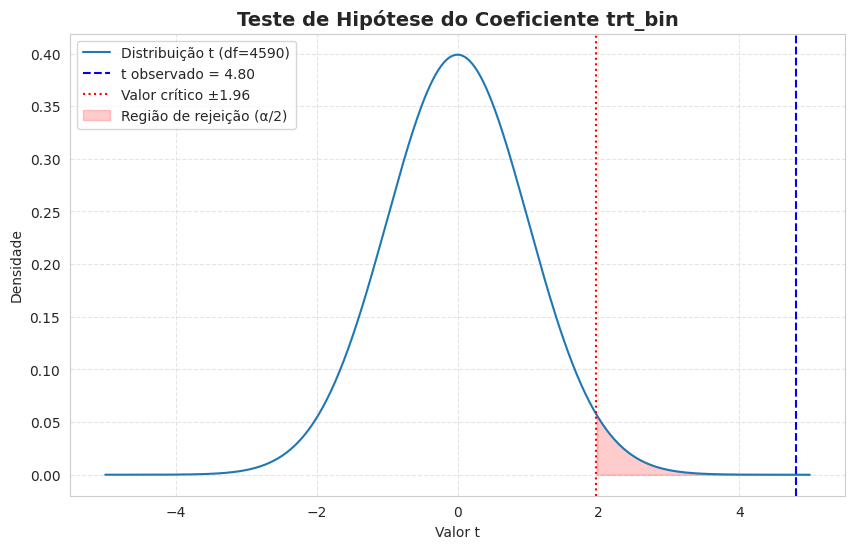

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- pegar dados do modelo ---
t_stat = modelo_6_ols.tvalues["trt_bin"]
df = int(modelo_6_ols.df_resid)
alpha = 0.05

# valor crítico bilateral
t_crit = stats.t.ppf(1 - alpha/2, df)

# --- gerar distribuição t ---
x = np.linspace(-5, 5, 500)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10,6))

# curva t
plt.plot(x, y, label=f"Distribuição t (df={df})")

# linha da estatística t observada
plt.axvline(t_stat, color="blue", linestyle="--",
            label=f"t observado = {t_stat:.2f}")

# linhas críticas
plt.axvline(+t_crit, color="red", linestyle=":",
            label=f"Valor crítico \u00b1{t_crit:.2f}")

# regiões de rejeição
plt.fill_between(x[x > t_crit], 0, y[x > t_crit],
                 color="red", alpha=0.2, label="Região de rejeição (\u03b1/2)")


plt.title("Teste de Hipótese do Coeficiente trt_bin", fontsize=14, fontweight="bold")
plt.xlabel("Valor t")
plt.ylabel("Densidade")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

###β_trt = 7.0765

Crianças cujas mães receberam o tratamento apresentaram, em média, cerca de 7 pontos a mais de QI, em comparação com crianças cujas mães não receberam o tratamento, controlando todas as outras variáveis do modelo (prematuridade, idade materna, tabagismo, álcool, ordem de nascimento etc.).

###IC 95% = [4.185 ; 9.968]

Estamos 95% confiantes de que o verdadeiro efeito do tratamento no QI está entre 4 e 10 pontos.


###p < 0.001

O p-valor < 0.001 mostra que o efeito do tratamento no QI é estatisticamente significativo.

Ou seja, é extremamente improvável que essa diferença de 7 pontos tenha ocorrido apenas por acaso.

##**Análise gráfica de resíduos**

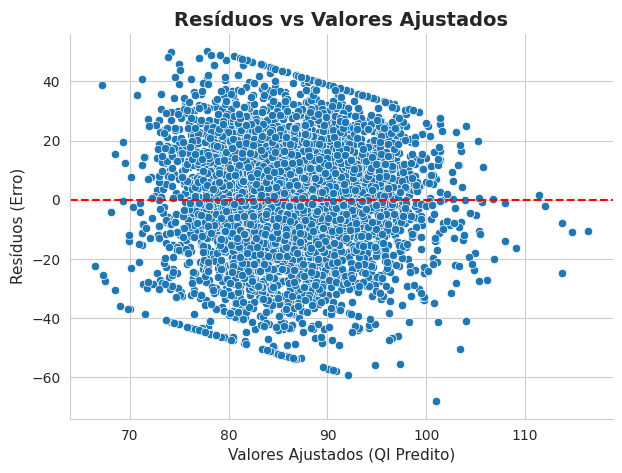

In [ ]:
residuos = modelo_6_ols.resid
ajustados = modelo_6_ols.fittedvalues
# Resíduos padronizados para o gráfico 4
residuos_padronizados = residuos / residuos.std()

# -----------------------------------------------------------
# 1. Resíduos vs Valores Ajustados (Linearidade e Homocedasticidade)
# -----------------------------------------------------------
plt.figure(figsize=(7, 5))
sns.scatterplot(x=ajustados, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Valores Ajustados", fontsize=14, fontweight='bold')
plt.xlabel("Valores Ajustados (QI Predito)", fontsize=11)
plt.ylabel("Resíduos (Erro)", fontsize=11)
sns.despine(top=True, right=True)
plt.show()

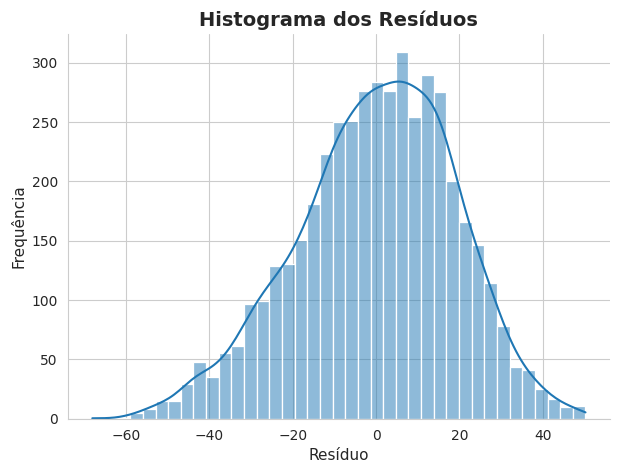

In [ ]:
# -----------------------------------------------------------
# 2. Histograma dos Resíduos (Normalidade)
# -----------------------------------------------------------
plt.figure(figsize=(7, 5))
sns.histplot(residuos, kde=True)
plt.title("Histograma dos Resíduos", fontsize=14, fontweight='bold')
plt.xlabel("Resíduo", fontsize=11)
plt.ylabel("Frequência", fontsize=11)
sns.despine(top=True, right=True)
plt.show()

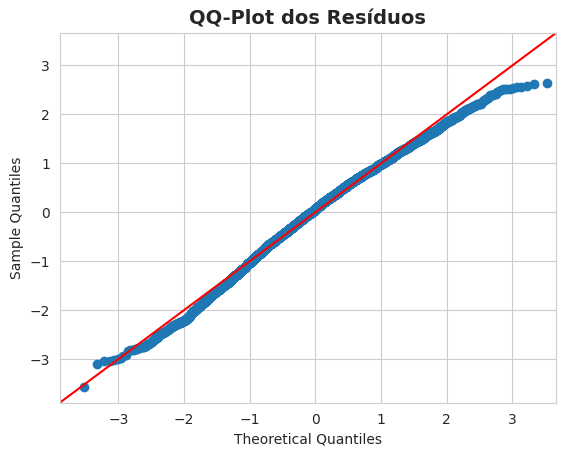

In [ ]:
# -----------------------------------------------------------
# 3. QQ-Plot (Normalidade dos Resíduos)
# -----------------------------------------------------------
sm.qqplot(residuos, line='45', fit=True)
plt.title("QQ-Plot dos Resíduos", fontsize=14, fontweight='bold')
plt.show()